In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from tqdm.notebook import tqdm

In [3]:
from textwrap import wrap
from io import BytesIO
from PIL import Image
import urllib.request

In [4]:
from emoji import UNICODE_EMOJI
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\agnid\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
from pathlib import Path        # file paths
from typing import Union        # type hints
import numpy as np              # linear algebra
import pandas as pd             # dataframes
import matplotlib.pyplot as plt # visualisations
import seaborn as sns           # visualisations
from scipy import stats  

In [6]:
METRICS_SCHEMA = {
    "Video": {
        "name": "video_id",
        "data_type": str
    },
    "Video title": {
        "name": "title",
        "data_type": str
    },
    "Video pub­lish time": {
        "name": "date",
        "data_type": "datetime"
    },
    "Com­ments ad­ded": {
        "name": "comment_count",
        "data_type": int
    },
    "Shares": {
        "name": "share_count",
        "data_type": int
    },
    "Likes": {
        "name": "like_count",
        "data_type": int
    },
    "Dis­likes": {
        "name": "dislike_count",
        "data_type": int
    },
    "Sub­scribers gained": {
        "name": "subscribers_gained",
        "data_type": int
    },
    "Sub­scribers lost": {
        "name": "subscribers_lost",
        "data_type": int
    },
    "Sub­scribers": {
        "name": "net_subscribers",
        "data_type": int
    },
    "Views": {
        "name": "view_count",
        "data_type": int
    },
    "Av­er­age per­cent­age viewed (%)": {
        "name": "average_view_ratio",
        "data_type": float
    },
    "Av­er­age view dur­a­tion": {
        "name": "average_watch_time",
        "data_type": "timedelta"
    },
    "Watch time (hours)": {
        "name": "total_watch_time",
        "data_type": float
    },
    "Im­pres­sions": {
        "name": "impression_count",
        "data_type": int
    },
    "Im­pres­sions click-through rate (%)": {
        "name": "click_through_rate",
        "data_type": float
    },
    "RPM (USD)": {
        "name": "rpm",
        "data_type": float
    },
    "CPM (USD)": {
        "name": "cpm",
        "data_type": float
    },
    "Your es­tim­ated rev­en­ue (USD)": {
        "name": "estimated_revenue",
        "data_type": float
    }
}

In [7]:
COMMENTS_SCHEMA = {
    "Comment_ID": {
        "name": "comment_id",
        "data_type": str
    },
    "Date": {
        "name": "date",
        "data_type": "datetime"
    },
    "VidId": {
        "name": "video_id",
        "data_type": str
    },
    "user_ID": {
        "name": "user_id",
        "data_type": str
    },
    "Comments": {
        "name": "comment_text",
        "data_type": str
    },
    "Reply_Count": {
        "name": "reply_count",
        "data_type": int
    },
    "Like_Count": {
        "name": "like_count",
        "data_type": int
    }
}

PERFORMANCE_SCHEMA_COUNTRY = {
    "Date": {
        "name": "date",
        "data_type": "datetime"
    },
    "Country Code": {
        "name": "country",
        "data_type": str
    },
    "Is Subscribed":{
        "name": "is_subscribed",
        "data_type": bool
    },
    "Video Title": {
        "name": "title",
        "data_type": str
    },
    "External Video ID": {
        "name": "video_id",
        "data_type": str
    },
    "Video Length": {
        "name": "length",
        "data_type": int
    },
    "Thumbnail link": {
        "name": "thumbnail",
        "data_type": str
    },
    "Views": {
        "name": "view_count",
        "data_type": int
    },
    "Video Likes Added": {
        "name": "likes_added",
        "data_type": int
    },
    "Video Dislikes Added": {
        "name": "dislikes_added",
        "data_type": int
    },
    "Video Likes Removed": {
        "name": "likes_removed",
        "data_type": int
    },
    "User Subscriptions Added": {
        "name": "subscribers_gained",
        "data_type": int
    },
    "User Subscriptions Removed": {
        "name": "subscribers_lost",
        "data_type": int
    },
    "Average View Percentage": {
        "name": "average_view_ratio",
        "data_type": float
    },
    "Average Watch Time": {
        "name": "average_watch_time",
        "data_type": float
    },
    "User Comments Added": {
        "name": "comments_added",
        "data_type": int
    }
}

In [8]:
PERFORMANCE_SCHEMA = {
    "Date": {
        "name": "date",
        "data_type": "datetime"
    },
    "Video Title": {
        "name": "title",
        "data_type": str
    },
    "External Video ID": {
        "name": "video_id",
        "data_type": str
    },
    "Video Length": {
        "name": "length",
        "data_type": int
    },
    "Thumbnail link": {
        "name": "thumbnail",
        "data_type": str
    },
    "Views": {
        "name": "view_count",
        "data_type": int
    },
    "Video Likes Added": {
        "name": "likes_added",
        "data_type": int
    },
    "Video Dislikes Added": {
        "name": "dislikes_added",
        "data_type": int
    },
    "Video Likes Removed": {
        "name": "likes_removed",
        "data_type": int
    },
    "User Subscriptions Added": {
        "name": "subscribers_gained",
        "data_type": int
    },
    "User Subscriptions Removed": {
        "name": "subscribers_lost",
        "data_type": int
    },
    "Average View Percentage": {
        "name": "average_view_ratio",
        "data_type": float
    },
    "Average Watch Time": {
        "name": "average_watch_time",
        "data_type": float
    },
    "User Comments Added": {
        "name": "comments_added",
        "data_type": int
    }
}

In [9]:
def typecast_column(column: pd.Series, data_type: Union[type, str]):
    if data_type == 'datetime':
        result = pd.to_datetime(column)
    elif data_type == 'timedelta':
        result = column.apply(lambda row: np.int16(pd.Timedelta(row).seconds))
    elif data_type == int:
        result = column.astype(np.int32)
    elif data_type == float:
        result = column.astype(np.float16)
    else:
        result = column.astype(data_type)
    return result





metrics_column_map = {
    column: METRICS_SCHEMA[column]["name"]
    for column
    in METRICS_SCHEMA.keys()
}

comments_column_map = {
    column: COMMENTS_SCHEMA[column]["name"]
    for column
    in COMMENTS_SCHEMA.keys()
}


performance_country_column_map = {
    column: PERFORMANCE_SCHEMA_COUNTRY[column]["name"]
    for column
    in PERFORMANCE_SCHEMA_COUNTRY.keys()
}

performance_column_map = {
    column: PERFORMANCE_SCHEMA[column]["name"]
    for column
    in PERFORMANCE_SCHEMA.keys()
}

In [11]:
data1_agg_country_suscriber: pd.DataFrame = pd.read_csv("Aggregated_Metrics_By_Country_And_Subscriber_Status.csv")
data2_agg_video: pd.DataFrame = pd.read_csv("Aggregated_Metrics_By_Video.csv")
data3_comments: pd.DataFrame = pd.read_csv("All_Comments_Final.csv")
data4_video_performance: pd.DataFrame = pd.read_csv("Video_Performance_Over_Time.csv")

In [12]:
for column in data1_agg_country_suscriber.columns:
    data1_agg_country_suscriber[column] = typecast_column(
        data1_agg_country_suscriber[column],
        PERFORMANCE_SCHEMA_COUNTRY[column]["data_type"]
    )

for column in data2_agg_video.columns:
    data2_agg_video[column] = typecast_column(
        data2_agg_video[column],
        METRICS_SCHEMA[column]["data_type"]
    )
    
for column in data3_comments.columns:
    data3_comments[column] = typecast_column(
        data3_comments[column],
        COMMENTS_SCHEMA[column]["data_type"]
    )
    
for column in data4_video_performance.columns:
    data4_video_performance[column] = typecast_column(
        data4_video_performance[column],
        PERFORMANCE_SCHEMA[column]["data_type"]
    )

In [13]:
data1_agg_country_suscriber.rename(columns=performance_country_column_map, inplace=True)
data2_agg_video.rename(columns=metrics_column_map, inplace=True)
data3_comments.rename(columns=comments_column_map, inplace=True)
data4_video_performance.rename(columns=performance_column_map, inplace=True)


In [14]:
def get_most_common_keywords(df, label="title", amount=20):

    return Counter(" ".join(df[label]).split()).most_common(amount)

In [15]:
data4_video_performance.describe()

length     view_count    likes_added  dislikes_added  \
count  111857.000000  111857.000000  111857.000000   111857.000000   
mean      874.615876      49.714287       2.095533        0.052424   
std       861.297667     316.557515      14.263695        1.852013   
min        47.000000       0.000000       0.000000        0.000000   
25%       375.000000       3.000000       0.000000        0.000000   
50%       548.000000       9.000000       0.000000        0.000000   
75%       917.000000      28.000000       1.000000        0.000000   
max      5029.000000   35677.000000    1610.000000      289.000000   

       likes_removed  subscribers_gained  subscribers_lost  \
count  111857.000000       111857.000000     111857.000000   
mean        0.086789            1.169180          0.026391   
std         1.793532           12.109065          0.313908   
min         0.000000            0.000000          0.000000   
25%         0.000000            0.000000          0.000000   
50%         0.000000            0.000000          0.000000   
75%         0.000000            0.000000          0.000000   
max       420.000000         1844.000000         32.000000   

       average_view_ratio  average_watch_time  comments_added  
count       110510.000000          110510.000        111857.0  
mean             0.000000                 NaN             0.0  
std              0.000000                 NaN             0.0  
min              0.000000               0.000             0.0  
25%              0.177979             117.375             0.0  
50%              0.336914             181.500             0.0  
75%              0.476318             268.250             0.0  
max              8.476562            5324.000             0.0

In [16]:
data3_comments.head(3)

comment_text  \
0  Thanks for this video Ken.\n\nI decided to go ...   
1  Hello ken jee!!! I'm doing a graduation on Com...   
2  Thanks for this video, man. So useful. I'll me...   

                   comment_id  reply_count  like_count  \
0  UgxFZTIzC4UPyhhX_PZ4AaABAg            0           0   
1  Ugx3IYuAufhb932GYQx4AaABAg            0           0   
2  UgyhwwoK24arzRt1mud4AaABAg            0           0   

                       date     video_id    user_id  
0 2022-01-22 08:13:29+00:00  xpIFS6jZbe8   user_981  
1 2022-01-22 01:09:46+00:00  xpIFS6jZbe8   user_213  
2 2022-01-21 23:59:05+00:00  rEWPqw6rMGI  user_1065

In [17]:
data1_agg_country_suscriber.head(3)

title     video_id  length  \
0  🌶 Hot Topics in Tech: Data Science Explained #...  OtqQYqRNDGI      59   
1  🌶 Hot Topics in Tech: Data Science Explained #...  OtqQYqRNDGI      59   
2  🌶 Hot Topics in Tech: Data Science Explained #...  OtqQYqRNDGI      59   

                                          thumbnail country  is_subscribed  \
0  https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg      HK           True   
1  https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg      ME           True   
2  https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg      RW           True   

   view_count  likes_added  dislikes_added  likes_removed  subscribers_gained  \
0          23            1               0              0                   2   
1           3            0               0              0                   0   
2           2            0               0              0                   0   

   subscribers_lost  average_view_ratio  average_watch_time  comments_added  
0                 0            0.671875            39.62500               0  
1                 0            0.498779            29.43750               0  
2                 0            0.681641            40.21875               0

In [18]:
data2_agg_video.describe()

comment_count   share_count  dislike_count     like_count  \
count     224.000000    224.000000     224.000000     224.000000   
mean      126.750000    353.924107      34.839286    2008.919643   
std       948.732371   2736.321694     268.668317   15387.274015   
min         0.000000      0.000000       0.000000       1.000000   
25%        18.000000     19.000000       1.000000     163.500000   
50%        37.000000     46.500000       4.000000     342.500000   
75%        66.250000    114.250000      11.000000     716.000000   
max     14197.000000  39640.000000    3902.000000  225021.000000   

       subscribers_lost  subscribers_gained         rpm         cpm  \
count        224.000000          224.000000  224.000000  222.000000   
mean         217.620536         1608.084821    4.441406   11.445312   
std         3058.766918        15628.834115    1.789062    3.335938   
min            0.000000            0.000000    0.000000    5.437500   
25%            2.000000           27.000000    3.221191    9.375000   
50%            7.000000           70.000000    4.335938   11.171875   
75%           14.000000          245.500000    5.373047   12.906250   
max        45790.000000       229241.000000   10.390625   37.781250   

       average_view_ratio  average_watch_time    view_count  total_watch_time  \
count          224.000000          224.000000  2.240000e+02        224.000000   
mean            34.093750          200.678571  4.971645e+04               inf   
std             15.117188           94.437225  3.810302e+05               NaN   
min              5.230469           25.000000  6.000000e+01          1.068359   
25%             23.601562          144.750000  3.940000e+03        177.062500   
50%             35.109375          189.000000  8.347500e+03        397.875000   
75%             43.460938          241.250000  1.836875e+04       1146.000000   
max             76.625000          621.000000  5.568487e+06               inf   

       net_subscribers  estimated_revenue  impression_count  \
count       224.000000       2.240000e+02      2.240000e+02   
mean       1390.464286       2.595000e+02      9.013573e+05   
std       12647.246927                inf      6.967916e+06   
min         -21.000000       0.000000e+00      3.650000e+02   
25%          19.750000       1.221094e+01      9.947100e+04   
50%          62.500000       3.259375e+01      1.541925e+05   
75%         230.500000       9.682812e+01      2.894885e+05   
max      183451.000000       2.907200e+04      1.009541e+08   

       click_through_rate  
count          224.000000  
mean             3.083984  
std              1.669922  
min              0.489990  
25%              1.924805  
50%              2.895508  
75%              3.975586  
max             11.507812

In [19]:
mean_ctr = data2_agg_video["click_through_rate"].mean()
# mean ctr: 3.08
# mean views: 49716
mask1 = (data2_agg_video["view_count"] > 1000) & (data2_agg_video["click_through_rate"] > (mean_ctr + data2_agg_video["click_through_rate"].std()))
mask2 = (data2_agg_video["view_count"] > 1000)

q1_ctr_best = data2_agg_video[mask1].sort_values(["click_through_rate","view_count"], axis=0, ascending=[False,False])
len_q1_ctr_best = len(q1_ctr_best)
q1_ctr_worst = data2_agg_video[mask2].sort_values(["click_through_rate","view_count"], axis=0, ascending=[False,False]).tail(len_q1_ctr_best)

print(len_q1_ctr_best)


30


video_id                                      title       date  \
20  SVtRsDhHlDk                    Why I Quit Data Science 2021-02-12   
75  RRSRKf9eQxc  Should You Get A Masters in Data Science? 2018-11-14   

    comment_count  share_count  dislike_count  like_count  subscribers_lost  \
20            165          197            159        2274                85   
75             56           41             10         276                 2   

    subscribers_gained       rpm        cpm  average_view_ratio  \
20                 832  4.042969   9.851562            41.00000   
75                  81  7.398438  15.203125            45.21875   

    average_watch_time  view_count  total_watch_time  net_subscribers  \
20                 136       98777            3756.0              747   
75                 152       18488             782.5               79   

    estimated_revenue  impression_count  click_through_rate  
20             399.25            659163            8.617188  
75             136.75            173610            8.398438

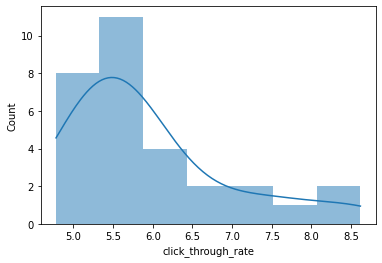

In [20]:
sns.histplot(q1_ctr_best['click_through_rate'], kde=True, linewidth=0)
q1_ctr_best.head(2)

video_id                                              title  \
167  9D7GzskcyUk        5 Tips for Crushing the Work From Home Life   
70   UcilY6HDuL8  10000 Subscriber and 100th Video Special (Data...   

          date  comment_count  share_count  dislike_count  like_count  \
167 2020-04-20             18           32             14         200   
70  2020-05-13             58           12              4         149   

     subscribers_lost  subscribers_gained       rpm        cpm  \
167                 2                  50  9.476562  17.421875   
70                  2                  53  0.000000        NaN   

     average_view_ratio  average_watch_time  view_count  total_watch_time  \
167           34.968750                 119        4934          164.5000   
70            24.015625                  41        3064           35.0625   

     net_subscribers  estimated_revenue  impression_count  click_through_rate  
167               48              46.75            580788            0.509766  
70                51               0.00            400077            0.489990

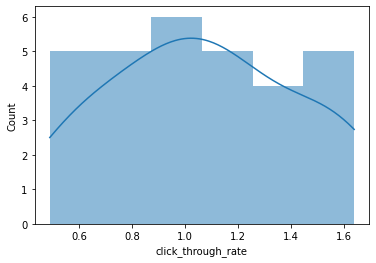

In [21]:
sns.histplot(q1_ctr_worst['click_through_rate'], kde=True, linewidth=0)
q1_ctr_worst.tail(2)

In [22]:
def parse_q1(df):
    q1_video_id = df["video_id"].values
    q1_titles = df["title"].values
    q1_thumbnails = []
    for i in range(len(q1_video_id)):
        thumbnail = data1_agg_country_suscriber[data1_agg_country_suscriber["video_id"] == q1_video_id[i]].iloc[0]["thumbnail"]
        q1_thumbnails.append(thumbnail)
    q1_thumbnails = np.array(q1_thumbnails)

    return q1_video_id, q1_titles, q1_thumbnails

def request_url_image(url):
    # Adding information about user agent to don't get blocked
    opener=urllib.request.build_opener()
    opener.addheaders=[('User-Agent','Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')]
    urllib.request.install_opener(opener)    
    # calling urlretrieve function to get resource
    img = Image.open(BytesIO(urllib.request.urlopen(url).read()))

    return img

def plot_imgs_grid(rows,cols,titles,images,figsize=(36,28)):

    f, axarr = plt.subplots(5,6, figsize=figsize) # (width,height)

    counter = 0
    for i in range(rows):
        for j in range(cols):
            title = titles[counter].replace("$", "d")  # matplotlib exception with $
            try:
                title = "\n".join(wrap(title, width=30))
            except:
                pass
            axarr[i,j].imshow(images[counter])
            axarr[i,j].set_title(title,fontsize=20)
            counter += 1
    plt.show()

In [23]:
q1_video_id_b, q1_titles_b, q1_thumbnails_b = parse_q1(q1_ctr_best)
q1_thumbnails_as_img_b = []
for i in tqdm(range(len(q1_thumbnails_b))):
    q1_thumbnails_as_img_b.append(request_url_image(q1_thumbnails_b[i]))

  0%|          | 0/30 [00:00<?, ?it/s]

In [24]:
q1_video_id_w, q1_titles_w, q1_thumbnails_w = parse_q1(q1_ctr_worst)
q1_thumbnails_as_img_w = []
for i in tqdm(range(len(q1_thumbnails_w))):
    q1_thumbnails_as_img_w.append(request_url_image(q1_thumbnails_w[i]))
# worst to best: invert
q1_video_id_w = q1_video_id_w[::-1]
q1_titles_w = q1_titles_w[::-1]
q1_thumbnails_as_img_w = q1_thumbnails_as_img_w[::-1]

  0%|          | 0/30 [00:00<?, ?it/s]

C:\New folder\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Glyph 127798 (\N{HOT PEPPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


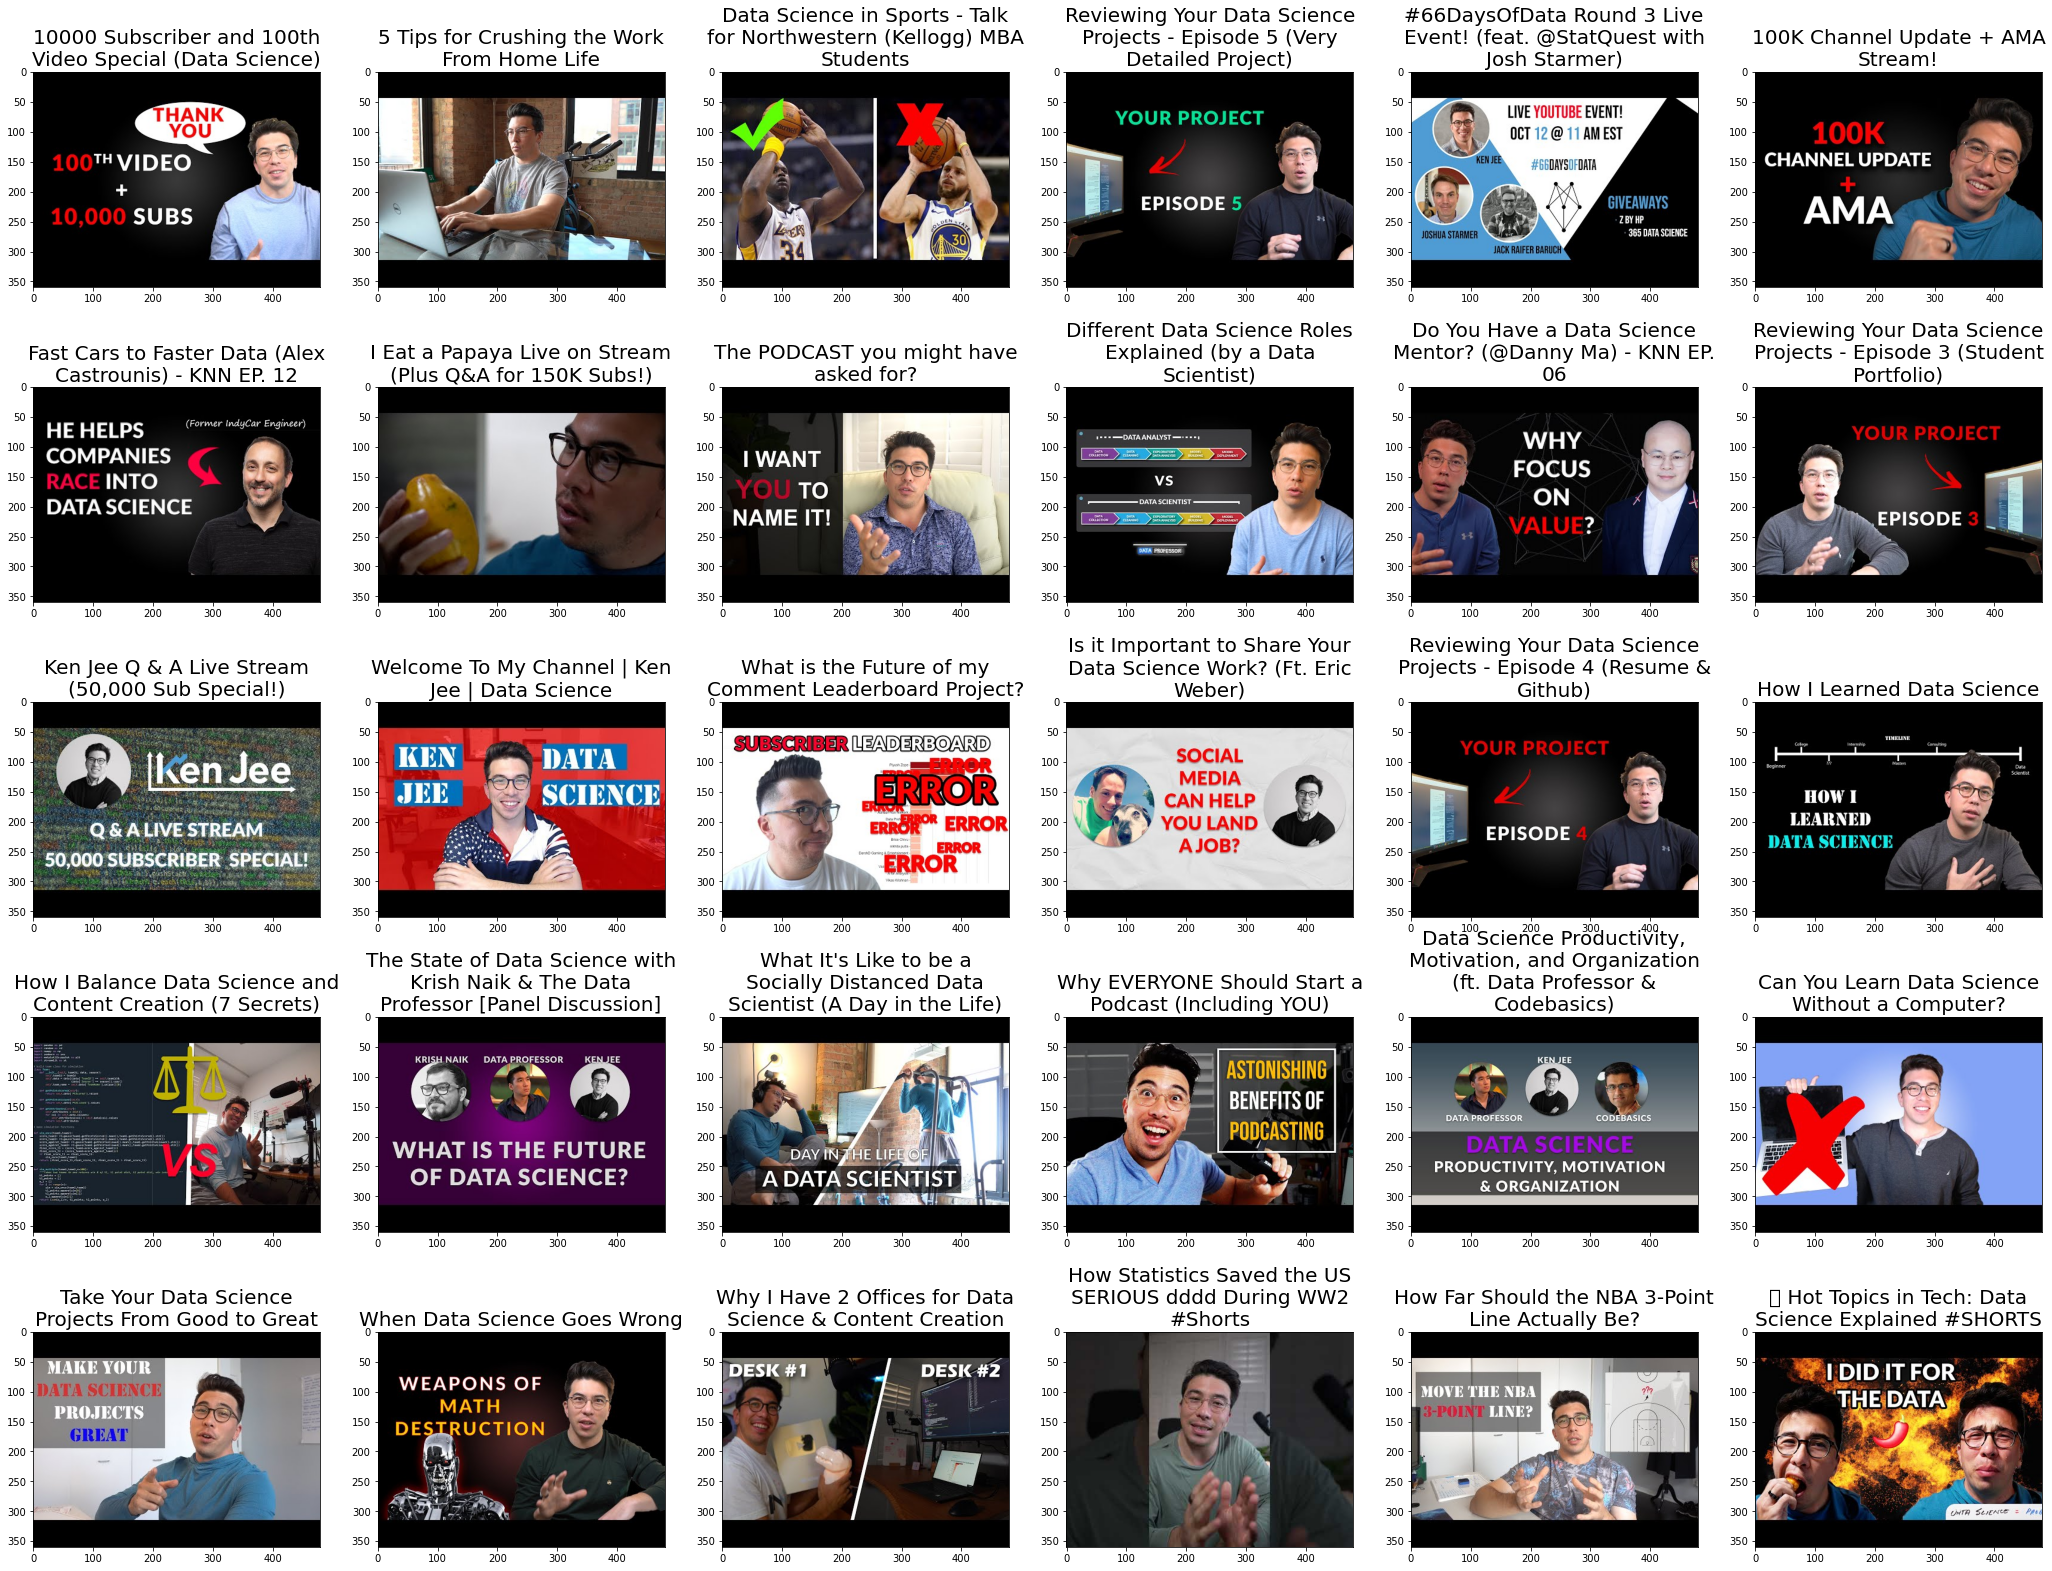

In [25]:
plot_imgs_grid(5,6,q1_titles_w,q1_thumbnails_as_img_w)

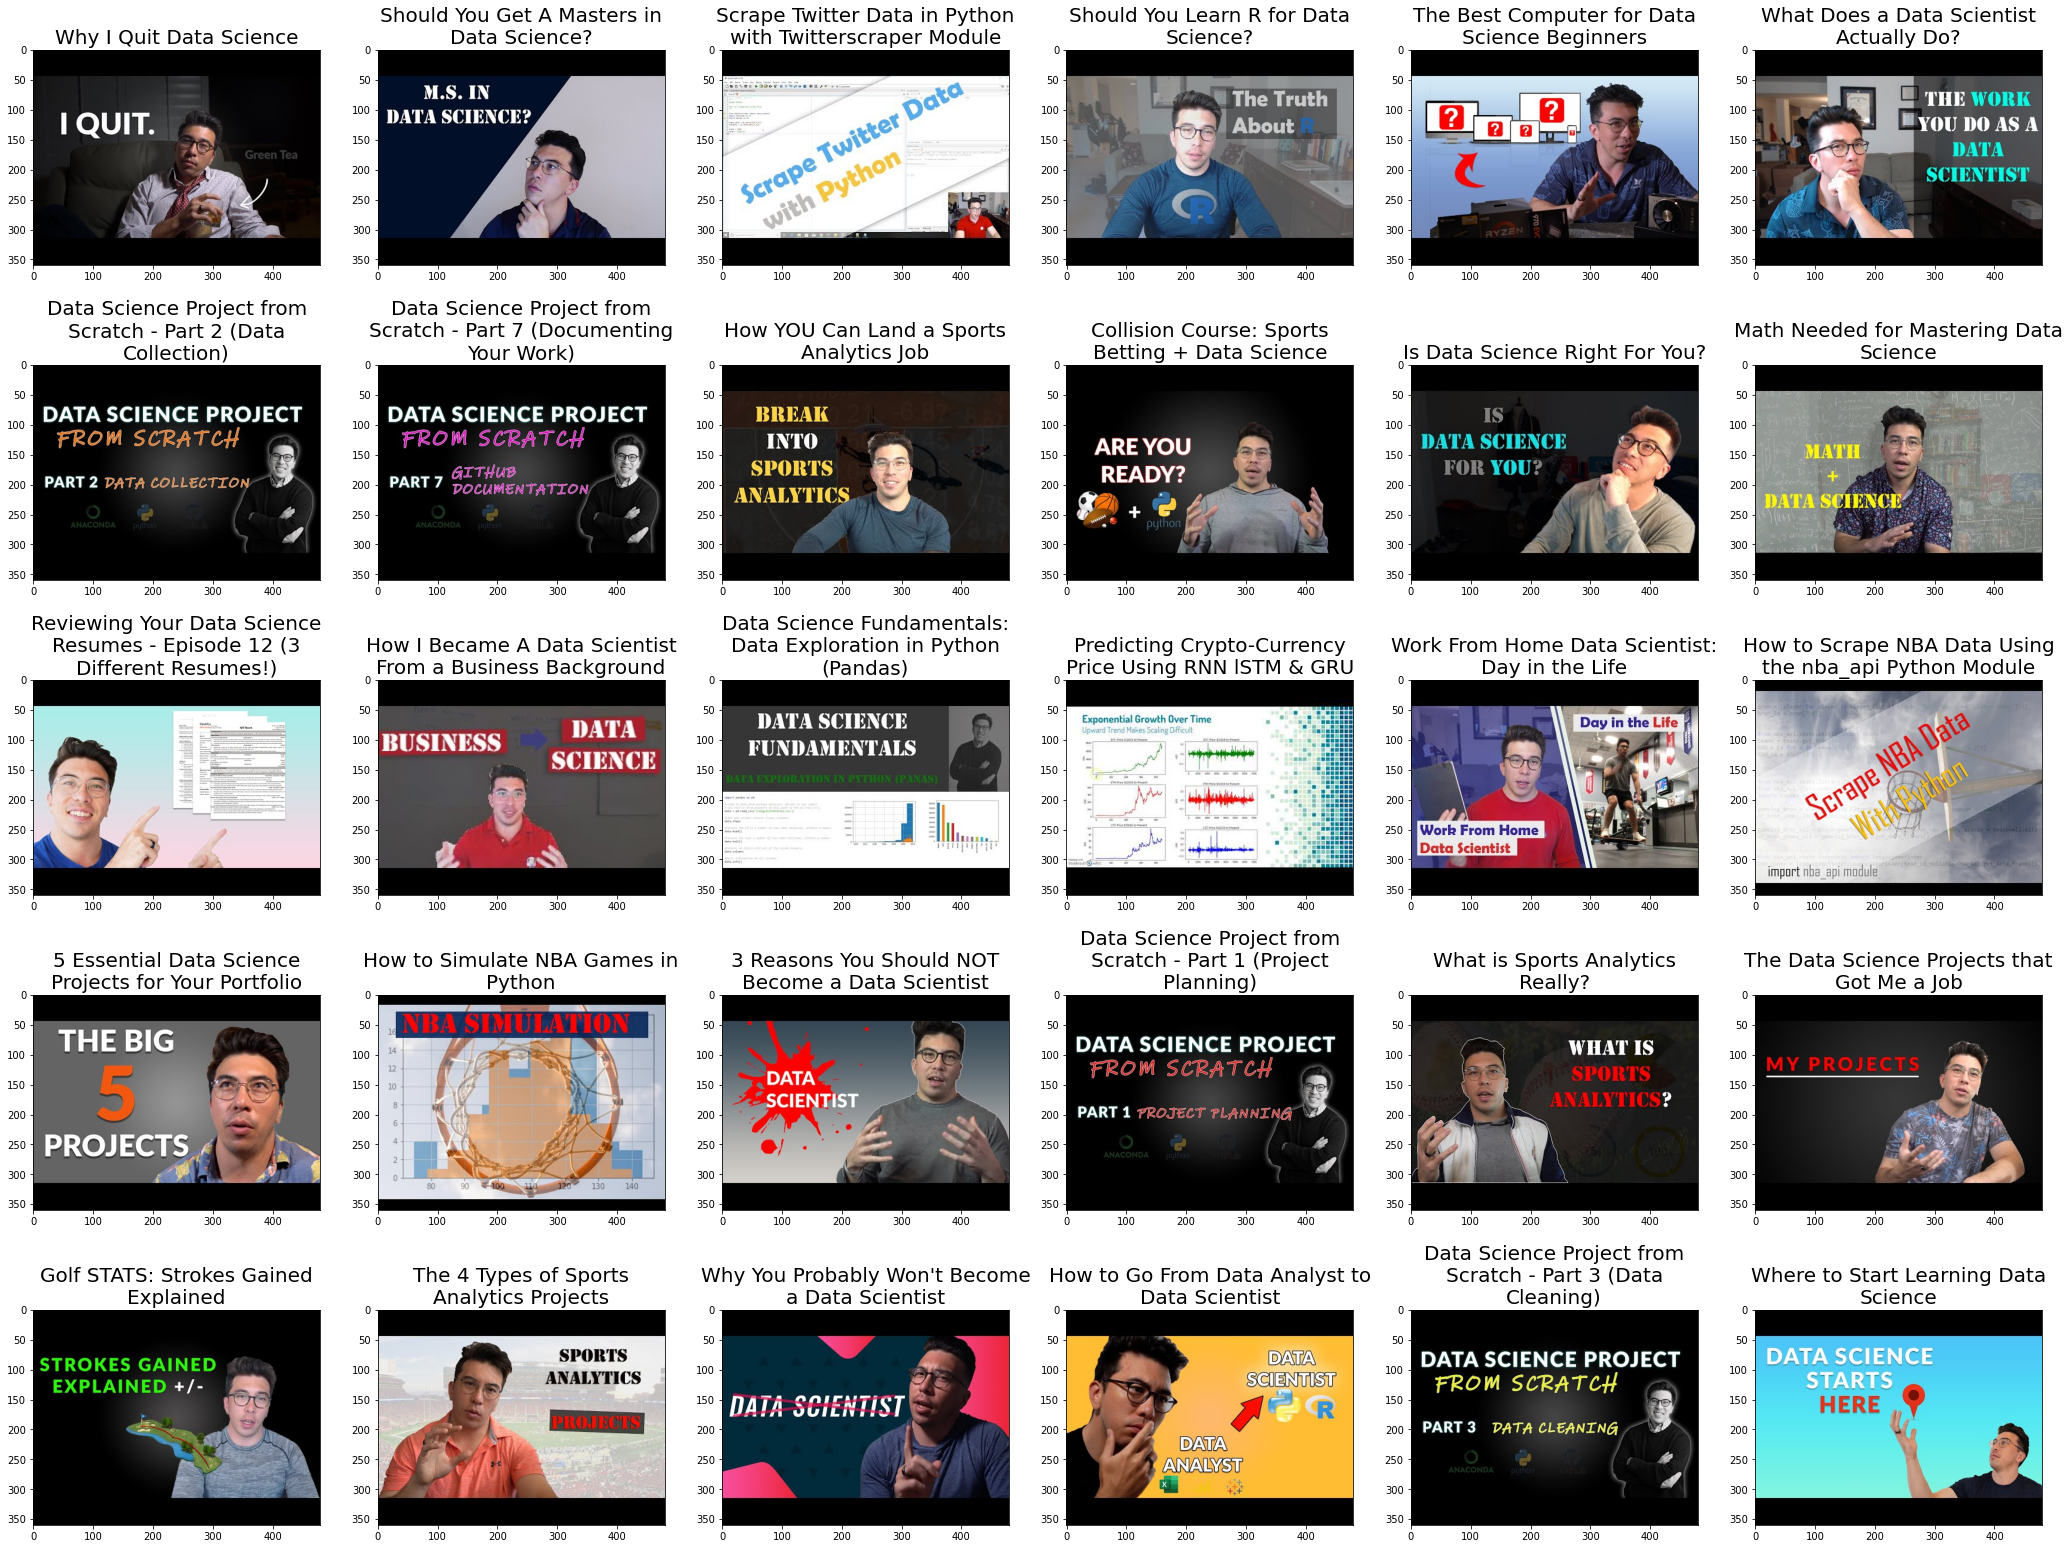

In [26]:
plot_imgs_grid(5,6,q1_titles_b,q1_thumbnails_as_img_b)

In [27]:
get_most_common_keywords(q1_ctr_best,"title",10)

[('Data', 26),
 ('Science', 14),
 ('a', 6),
 ('in', 5),
 ('Scientist', 5),
 ('-', 5),
 ('How', 5),
 ('to', 5),
 ('You', 4),
 ('Python', 4)]

In [28]:
get_most_common_keywords(q1_ctr_worst,"title",10)

[('Data', 22),
 ('Science', 17),
 ('a', 6),
 ('-', 6),
 ('the', 5),
 ('&', 5),
 ('Your', 5),
 ('How', 4),
 ('I', 4),
 ('for', 4)]

In [29]:
# total_watch_time is not useful, to determine shorts we need the video duration
total_watch_time_percentile_50 = 397.875 # got from data2_agg_video.describe()
maskq2_1 = (data2_agg_video["total_watch_time"] < total_watch_time_percentile_50)  # (data2_agg_video["title"]).apply(lambda s: "#SHORTS" in s) -> can analyze the two short videos
q2_shorts = data2_agg_video[maskq2_1].sort_values(["average_view_ratio","average_watch_time","click_through_rate"],axis=0,ascending=False).loc[:,["video_id","title","average_view_ratio","average_watch_time","view_count", "total_watch_time","click_through_rate"]].head(30)
q2_normal = data2_agg_video[~maskq2_1].sort_values(["average_view_ratio","average_watch_time","click_through_rate"],axis=0,ascending=False).loc[:,["video_id","title","average_view_ratio","average_watch_time","view_count", "total_watch_time","click_through_rate"]].head(30)

In [30]:
# engagging videos with short consuming time
q2_shorts.loc[:,["title","average_view_ratio","click_through_rate","view_count"],].head()

title  average_view_ratio  \
170  Project Presentation - Expectations vs. Realit...             76.6250   
191  How Statistics Saved the US SERIOUS $$$$ Durin...             75.6250   
166          Is Spotify Shuffle Really Random? #Shorts             74.3750   
171  Data Science Project - Expectations vs Reality...             71.9375   
187  Should  @Luke Barousse Take This Data Analyst ...             70.6875   

     click_through_rate  view_count  
170            1.690430        5932  
191            1.610352        3130  
166            1.870117        6579  
171            3.820312       14136  
187            2.640625        2401

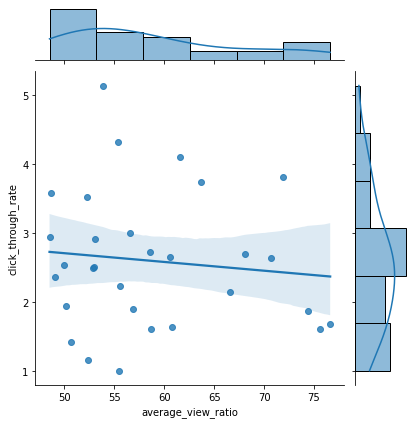

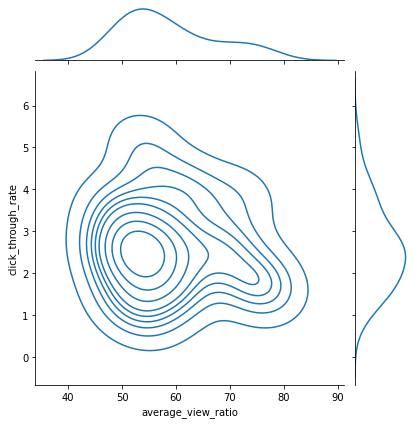

In [31]:
# Evaluating click bait
sns.jointplot(x='average_view_ratio', y='click_through_rate', data=q2_shorts, kind='reg')
sns.jointplot(x='average_view_ratio', y='click_through_rate', data=q2_shorts, kind='kde')

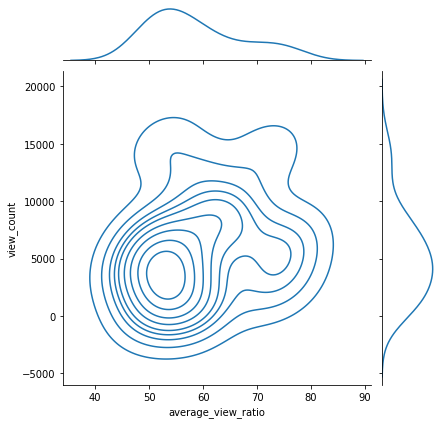

In [32]:
# Evaluating engagging and view count
# Note that the regression line is a little similar as before
sns.jointplot(x='average_view_ratio', y='view_count', data=q2_shorts, kind='kde')

In [33]:
# engagging with normal-long consumming time videos (These are favorites of youtube, since YT neural network want to extend session time)
q2_normal.loc[:,["title","average_view_ratio","click_through_rate","view_count"],].head()

title  average_view_ratio  \
144  What You Need to Know for a Data Science Inter...            54.03125   
105               Should You Learn R for Data Science?            53.40625   
124              The 5 Stages of Learning Data Science            50.43750   
36              Math Needed for Mastering Data Science            49.15625   
69                Where to Start Learning Data Science            49.09375   

     click_through_rate  view_count  
144            4.550781       12317  
105            7.449219       15243  
124            3.650391       15398  
36             5.800781       48401  
69             4.781250       16882

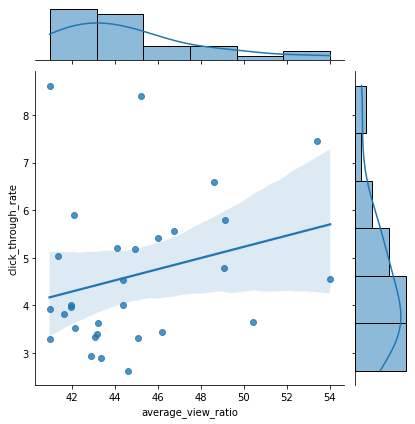

In [34]:
# Evaluating click bait
sns.jointplot(x='average_view_ratio', y='click_through_rate', data=q2_normal, kind='reg')

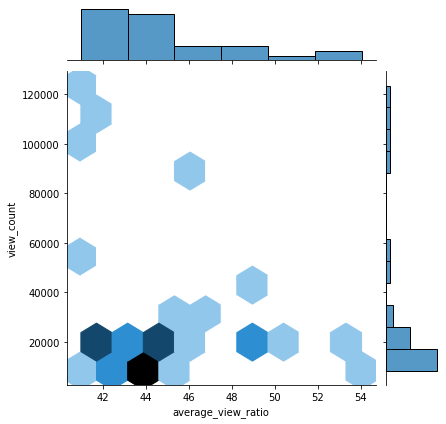

In [35]:
# Evaluating engagging and view count
# Note that the regression line goes from up to down instead of down to up
sns.jointplot(x='average_view_ratio', y='view_count', data=q2_normal, kind='hex')

In [36]:
def score_r1(text):
    title = f"{text.lower()}"
    score = [0,0,0,0]
    # some, name all triggers is about 1 millon of frases
    # i base this on spanish triggers, english may differ just a little
    # 0=curiosity, 1=fear, 2=utility, 3=urgency
    # include some niche words?
    triggers = {
        0: ["secret","top","need","life","what","why","where","when","bought", "and this happened", "reveal", "discover", "won't believe it", "surprise", "interest", "you don't know","reasons"],
        1: ["loss","care", "danger", "attention", "error", "problem", "trap", "scam", "ban", "forbidden"],
        2: ["best","how", "easy", "step","fast","trick","tip","strategy","definitive","proven","works","you", "you must","beginners","course","data science","data scientist","project","faang","maang"],
        3: ["urgent","now","hurry","limited","last","chance","free","actual","2017","2018","2019","2020","2021","2022"]
    }

    # python string search uses KMP similar algorithm so brute force it's ok (maybe)
    for key,array in triggers.items():
        for keyword in array:
            if keyword in title:
                score[key] += 1
    return score

def score_r2(text):
    title = f"{text.lower()}"
    score = 0
    ascii_common = ["!", "?", "+"]
    for ac in ascii_common:
        if ac in title:
            score += 0.5

    return score


def score_r3(text):
    title = f"{text.lower()}"
    # we need ML and more data from other youtubers. So ignore
    # Even better, do specific human analysis.
    return 0

def score_r4(text):
    title = f"{text.lower()}"
    score = 0
    # favorite numbers for seo: 1-3-5-7-10-12-15 multiples
    # worst seo numbers 2-4-6
    numbers = [f"{i} " for i in range(0,10)]
    for number in numbers:
        if number in title:
            score += 1
            if number in ["1 ","3 ","5 ","7 "]:
                score += 1
            break

    return score

def score_r5(text):
    title = f"{text.lower()}"
    score = 0
    # some with some niche words
    action_verbs = ["scrape", "in python","win ","learn", "discover", "control", "create", "find", "teach", "shows", "demonstrates", "rid", "imagine", "improve", "want", "get", "fulfill", "order", "organize"]

    for av in action_verbs:
        if av in title:
            score += 1

    return score

def score_r6(text):
    title = f"{text.lower()}"
    score = 0
    for emoji in UNICODE_EMOJI["en"]:
        score += title.count(emoji)

    if score > 4:
        score = -1

    return score

# r7 ignored

# sanity check
print(score_r1("REVEALED ML trick for this actual CRYPTO winter!"))
print(score_r2("REVEALED ML trick for this CRYPTO winter!"))
# print(score_r3("REVEALED ML trick this actual CRYPTO winter!"))
print(score_r4("3 ML tricks to win money in this CRYPTO winter!"))
print(score_r5("LEARN this ML trick for CRYPTO winter!"))
print(score_r6("100 For 😘 ◼️ YouTube 🚀!!")) # ◼️ = 2 emojis

[1, 0, 1, 1]
0.5
2
1
4


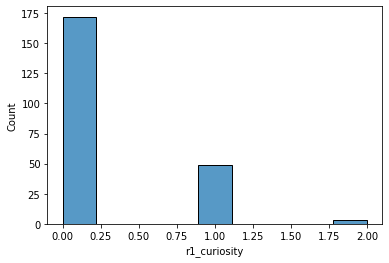

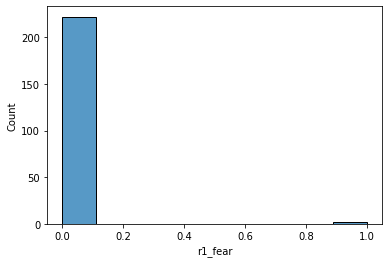

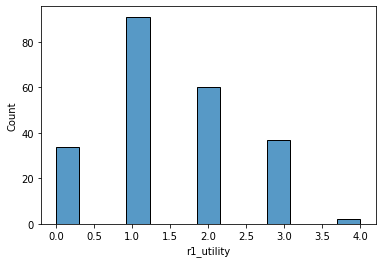

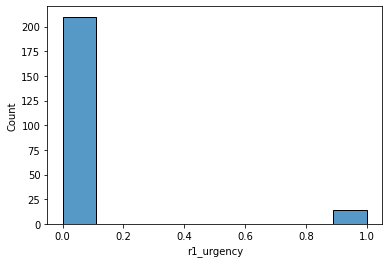

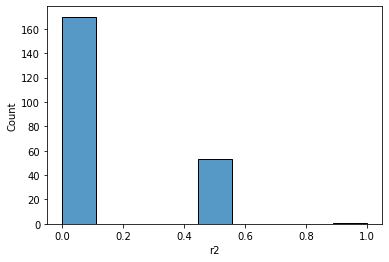

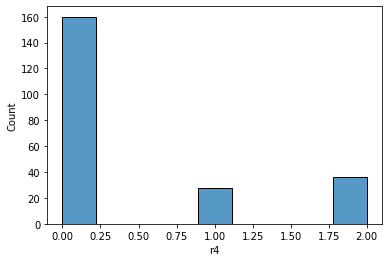

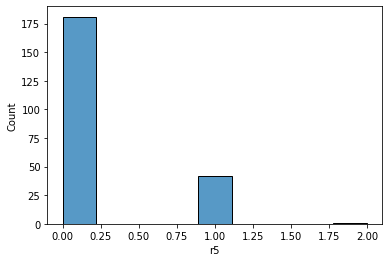

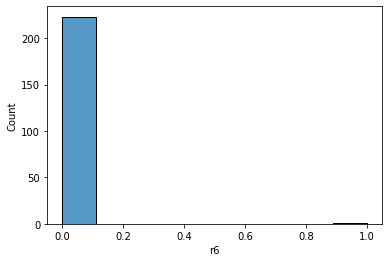

In [37]:
# Save the scores for each video, and see the distribution of this scores in the dataset
cols_scores_r = ["r1_curiosity","r1_fear","r1_utility","r1_urgency","r2","r4","r5","r6"]
title_score_r1 = data2_agg_video["title"].apply(score_r1)
data2_agg_video["r1_curiosity"] = title_score_r1.apply(lambda array: array[0])
data2_agg_video["r1_fear"] = title_score_r1.apply(lambda array: array[1])
data2_agg_video["r1_utility"] = title_score_r1.apply(lambda array: array[2])
data2_agg_video["r1_urgency"] = title_score_r1.apply(lambda array: array[3])
data2_agg_video["r2"] = data2_agg_video["title"].apply(score_r2)
data2_agg_video["r4"] = data2_agg_video["title"].apply(score_r4)
data2_agg_video["r5"] = data2_agg_video["title"].apply(score_r5)
data2_agg_video["r6"] = data2_agg_video["title"].apply(score_r6)

for c in cols_scores_r:
    sns.histplot(data2_agg_video[c])
    plt.show()

In [38]:
# View the best scored videos
data2_agg_video["final_score"] = data2_agg_video.loc[:, cols_scores_r].sum(axis=1)
data2_agg_video.sort_values(["final_score","click_through_rate"], axis=0, ascending=[False,False],inplace=True)
data2_agg_video.loc[:,["title","click_through_rate","final_score","view_count"]].head(20)

title  click_through_rate  \
12   How I Would Learn Data Science in 2021 (What H...            3.929688   
137  Reviewing Your Data Science Projects - Episode...            2.929688   
13   3 Proven Data Science Projects for Beginners (...            4.011719   
112  How To Learn Programming for Data Science [3 S...            4.011719   
71   Data Science Project from Scratch - Part 7 (Do...            6.179688   
26   5 Essential Data Science Projects for Your Por...            5.449219   
34    3 Reasons You Should NOT Become a Data Scientist            5.410156   
209           My Top 5 Data Science Resources for 2019            4.679688   
144  What You Need to Know for a Data Science Inter...            4.550781   
193              My Top 5 Data Science Internship Tips            4.531250   
79   The Secret Data Scientists Don't Want You to Know            4.101562   
162  Reviewing Your Data Science Projects - Episode...            3.400391   
32   How I Would Learn Data Science in 2022 (If I H...            3.310547   
127  Reviewing Your Data Science Projects - Episode...            2.990234   
106  5 Unusual Data Science Projects that Will Land...            2.919922   
141  Reviewing Your Data Science Projects - Episode...            2.910156   
81   Reviewing Your Data Science Projects - Episode...            2.679688   
82   Find a Data Science Project With These 3 Techn...            2.509766   
142  Reviewing Your Data Science Projects - Episode...            2.429688   
154  Reviewing Your Data Science Projects - Episode...            2.380859   

     final_score  view_count  
12           7.5      123515  
137          6.5        9384  
13           6.0      237467  
112          6.0       25616  
71           5.0       12427  
26           5.0       51092  
34           5.0       93329  
209          5.0        3406  
144          5.0       12317  
193          5.0        8420  
79           5.0        9503  
162          5.0        7705  
32           5.0       79283  
127          5.0        8778  
106          5.0        7354  
141          5.0        7480  
81           5.0        5106  
82           5.0       13931  
142          5.0        4470  
154          5.0        5504

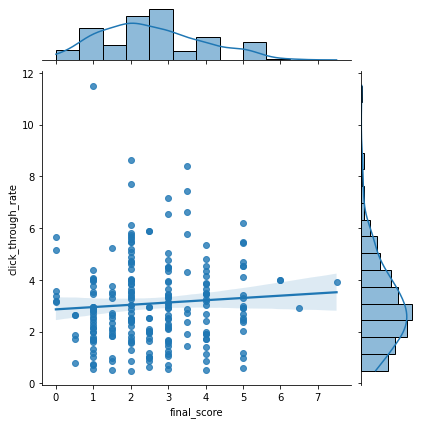

In [39]:
# linear relation between the score calculated and CTR
sns.jointplot(x="final_score",y="click_through_rate",data=data2_agg_video,kind="reg")

In [40]:
# First analyze contry data
country_top10_view = data1_agg_country_suscriber.sort_values(["view_count"],ascending=False,axis=0).head(10)
country_top10_sub_gained = data1_agg_country_suscriber.sort_values(["subscribers_gained"],ascending=False,axis=0).head(10)
country_top10_sub_average_view_ratio = data1_agg_country_suscriber.sort_values(["average_view_ratio"],ascending=False,axis=0).head(10)

<AxesSubplot:xlabel='country', ylabel='view_count'>

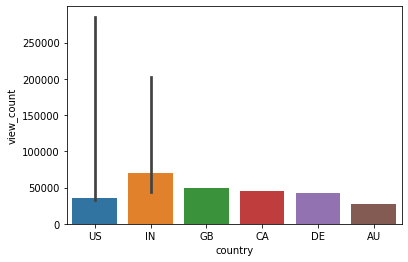

In [41]:
sns.barplot(x="country",y="view_count",data=country_top10_view, estimator=np.median)

<AxesSubplot:xlabel='country', ylabel='subscribers_gained'>

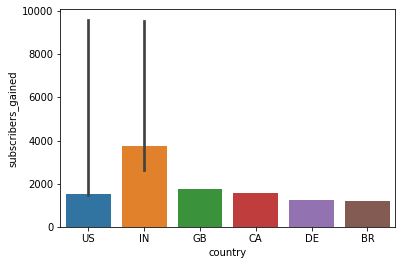

In [42]:
sns.barplot(x="country",y="subscribers_gained",data=country_top10_sub_gained, estimator=np.median)

<AxesSubplot:xlabel='country', ylabel='average_view_ratio'>

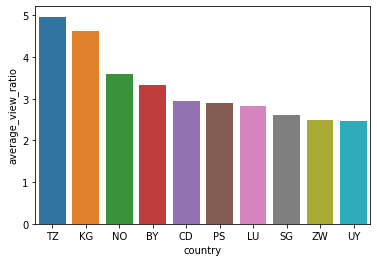

In [43]:
# this average view is unexpected
sns.barplot(x="country",y="average_view_ratio",data=country_top10_sub_average_view_ratio, estimator=np.median)

In [44]:
# In order to cluster titles, lets use TF-IDF
q4 = data2_agg_video["title"].values
print(len(q4))
vectorizer = TfidfVectorizer(stop_words={'english'}) # TF-IDF > Counting method
X_q4 = vectorizer.fit_transform(q4)

224


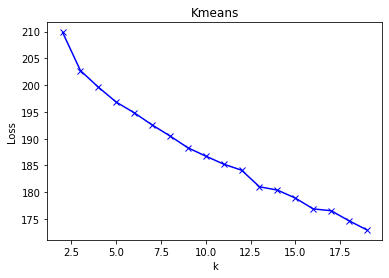

In [45]:
# Elbow curve to select K
score = []
K = range(2,20)
for k in K:
   model = KMeans(n_clusters=k, max_iter=200, n_init=10)
   model = model.fit(X_q4)
   score.append(model.inertia_)
plt.plot(K, score, 'bx-')
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Kmeans')
plt.show()

<AxesSubplot:xlabel='clusters', ylabel='Count'>

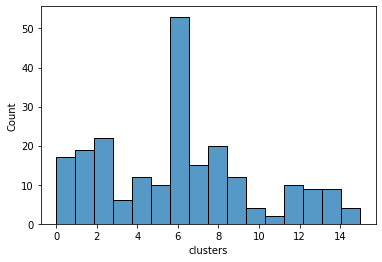

In [46]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=16)
# fit model and predict clusters
yhat_AC = AC.fit_predict(X_q4.toarray())
data2_agg_video["clusters"] = yhat_AC
sns.histplot(data2_agg_video["clusters"],bins=16)

<AxesSubplot:xlabel='clusters', ylabel='Count'>

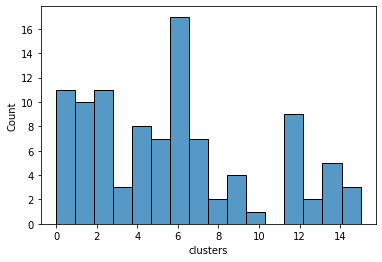

In [47]:
q4_top100 = data2_agg_video.sort_values(['click_through_rate','subscribers_gained'],ascending=False,axis=0).head(100)
sns.histplot(q4_top100["clusters"],bins=16)

In [48]:
q4_top100[q4_top100["clusters"] == 6].loc[:,["title","subscribers_gained","click_through_rate"]].head(11)

title  subscribers_gained  \
223                     ProjectDemoCSC478_UFCFightData                   0   
138  Predicting Crypto-Currency Price Using RNN lST...                 111   
210               Golf STATS: Strokes Gained Explained                  43   
17   Beginner Kaggle Data Science Project Walk-Thro...                2585   
93   How to Set Up Your Data Science Environment (A...                1207   
188                        Data Science: Pros and Cons                  44   
204  Predicting Season Long NBA Wins Using Multiple...                  34   
121  I Wish I Had Known THIS Before Starting in Dat...                 274   
143  How to Stay Productive & Motivated When Learni...                 132   
54                   Sh*t Data Scientists Say (Parody)                  20   
104  My First Data Science Contracting Side-Gig (Ho...                 121   

     click_through_rate  
223           11.507812  
138            5.648438  
210            5.140625  
17             4.710938  
93             4.488281  
188            4.070312  
204            4.031250  
121            4.000000  
143            3.880859  
54             3.750000  
104            3.640625

In [49]:
# Let's see the cluster 0
q4_top100[q4_top100["clusters"] == 0].loc[:,["title","subscribers_gained","click_through_rate"]].head(11)

title  subscribers_gained  \
21   Scrape Twitter Data in Python with Twitterscra...                 365   
190  How I Became A Data Scientist From a Business ...                  81   
91      Work From Home Data Scientist: Day in the Life                 418   
84   How to Scrape NBA Data Using the nba_api Pytho...                 210   
158                How to Simulate NBA Games in Python                 152   
48       How to Go From Data Analyst to Data Scientist                 613   
27   How to Build a Data Science Portfolio Website ...                 524   
38   How to Make A Data Science Portfolio Website w...                1234   
44   How I Chose My Masters Degree for Breaking int...                 184   
43                      How to ULTRALEARN Data Science                2136   
55   How I Use Data to Optimize My Life | What I Co...                  66   

     click_through_rate  
21             7.710938  
190            5.718750  
91             5.570312  
84             5.480469  
158            5.449219  
48             4.898438  
27             4.628906  
38             3.949219  
44             3.400391  
43             3.300781  
55             3.019531

In [50]:
# finally let's see the cluster 2
q4_top100[q4_top100["clusters"] == 2].loc[:,["title","subscribers_gained","click_through_rate"]].head(11)

title  subscribers_gained  \
75           Should You Get A Masters in Data Science?                  81   
33             How YOU Can Land a Sports Analytics Job                1860   
109  Reviewing Your Data Science Resumes - Episode ...                 207   
163        The Data Science Projects that Got Me a Job                 718   
145           The 4 Types of Sports Analytics Projects                 526   
140        5 Sports Analytics Books to Get You Started                 135   
119  How To Get Data Science Experience (Without a ...                 603   
99   How I Got My First Data Science Internship (An...                 505   
29   The Projects You Should Do To Get A Data Scien...                2793   
178  Sports Analytics 101: The Pythagorean Theorem ...                  89   
25   How to Get a Data Science Job at FAANG (@Data ...                 142   

     click_through_rate  
75             8.398438  
33             6.121094  
109            5.761719  
163            5.191406  
145            5.058594  
140            4.519531  
119            4.500000  
99             4.441406  
29             4.359375  
178            3.580078  
25             3.500000

In [51]:
# Calculate first the balance: positive - negative
# sr_relative is the percentage of subscribers respect view count
data2_agg_video["sr_relative"] = (data2_agg_video["subscribers_gained"]/data2_agg_video["view_count"]) * 100
data2_agg_video["sr_balance"] = (data2_agg_video["subscribers_gained"] - data2_agg_video["subscribers_lost"])
data2_agg_video["sr_balance_relative"] =  (data2_agg_video["sr_balance"]/data2_agg_video["view_count"]) * 100

q5_sr = data2_agg_video.sort_values(["sr_relative","view_count"],ascending=[False,False],axis=0)
q5_sr_plus = data2_agg_video.sort_values(["sr_balance_relative","view_count"],ascending=[False,False],axis=0)
q5_sr_minus = data2_agg_video.sort_values(["sr_balance_relative","view_count"],ascending=[True,False],axis=0)

In [52]:
# These are target videos. From videos with high CTR and views put a card linkin to this videos, so the no suscribed will be converted.
# ignore the total row (nan title)
q5_sr.loc[:,["title","sr_relative","subscribers_gained","click_through_rate"]].head(11)

title  sr_relative  \
37                          What is the #66DaysOfData?     4.525614   
0                                                  nan     4.116756   
13   3 Proven Data Science Projects for Beginners (...     4.003925   
4            Why I'm Starting Data Science Over Again.     3.948430   
43                      How to ULTRALEARN Data Science     3.861451   
218     Welcome To My Channel | Ken Jee | Data Science     3.836735   
1    How I Would Learn Data Science (If I Had to St...     3.741667   
33             How YOU Can Land a Sports Analytics Job     3.683314   
7    The Best Free Data Science Courses Nobody is T...     3.611442   
32   How I Would Learn Data Science in 2022 (If I H...     3.220110   
41   Data Science Project from Scratch - Part 1 (Pr...     3.095650   

     subscribers_gained  click_through_rate  
37                 2395            3.439453  
0                229241            3.160156  
13                 9508            4.011719  
4                  1957            4.011719  
43                 2136            3.300781  
218                  47            1.009766  
1                 46904            3.140625  
33                 1860            6.121094  
7                 10734            3.240234  
32                 2553            3.310547  
41                 3184            5.351562

In [53]:
q5_sr_plus.loc[:,["title","sr_balance_relative","sr_balance","click_through_rate"]].head(11)

title  sr_balance_relative  \
37                          What is the #66DaysOfData?             4.463257   
13   3 Proven Data Science Projects for Beginners (...             3.973605   
4            Why I'm Starting Data Science Over Again.             3.867727   
218     Welcome To My Channel | Ken Jee | Data Science             3.836735   
43                      How to ULTRALEARN Data Science             3.827102   
1    How I Would Learn Data Science (If I Had to St...             3.705689   
33             How YOU Can Land a Sports Analytics Job             3.651630   
7    The Best Free Data Science Courses Nobody is T...             3.567367   
0                                                  nan             3.294450   
32   How I Would Learn Data Science in 2022 (If I H...             3.162090   
41   Data Science Project from Scratch - Part 1 (Pr...             3.074261   

     sr_balance  click_through_rate  
37         2362            3.439453  
13         9436            4.011719  
4          1917            4.011719  
218          47            1.009766  
43         2117            3.300781  
1         46453            3.140625  
33         1844            6.121094  
7         10603            3.240234  
0        183451            3.160156  
32         2507            3.310547  
41         3162            5.351562

In [54]:
q5_sr_minus.loc[:,["title","sr_balance_relative","sr_balance","click_through_rate"]].head(11)

title  sr_balance_relative  \
182  I Eat a Papaya Live on Stream (Plus Q&A for 15...            -0.924703   
6      Ken Jee Q & A Live Stream (50,000 Sub Special!)            -0.214961   
2                    100K Channel Update + AMA Stream!            -0.130947   
170  Project Presentation - Expectations vs. Realit...            -0.033715   
187  Should  @Luke Barousse Take This Data Analyst ...             0.000000   
30   Fast Cars to Faster Data (Alex Castrounis) - K...             0.000000   
223                     ProjectDemoCSC478_UFCFightData             0.000000   
92              Is Your Phone REALLY Listening to You?             0.021887   
19   Do You Have a Data Science Mentor? (@Danny Ma)...             0.045704   
107              The PODCAST you might have asked for?             0.054466   
94      My Daily Battle With Time - Will I Win? [Vlog]             0.055325   

     sr_balance  click_through_rate  
182         -21            0.799805  
6            -5            0.979980  
2            -3            0.720215  
170          -2            1.690430  
187           0            2.640625  
30            0            0.759766  
223           0           11.507812  
92            1            1.950195  
19            1            0.959961  
107           1            0.850098  
94            2            1.719727

In [55]:
get_most_common_keywords(data2_agg_video,"title",40)

[('Data', 182),
 ('Science', 132),
 ('-', 59),
 ('to', 39),
 ('a', 38),
 ('How', 35),
 ('Your', 33),
 ('Projects', 29),
 ('The', 26),
 ('I', 25),
 ('in', 23),
 ('Episode', 23),
 ('for', 22),
 ('Reviewing', 21),
 ('You', 21),
 ('the', 21),
 ('Project', 18),
 ('My', 18),
 ('KNN', 16),
 ('EP.', 16),
 ('What', 15),
 ('Why', 14),
 ('5', 13),
 ('Should', 13),
 ('is', 13),
 ('of', 12),
 ('&', 12),
 ('from', 11),
 ('Scratch', 11),
 ('with', 11),
 ('3', 10),
 ('Part', 10),
 ('Scientist', 10),
 ('Job', 10),
 ('Learning', 10),
 ('From', 10),
 ('Learn', 9),
 ('Sports', 9),
 ('|', 9),
 ('and', 8)]

In [56]:
def label_sentiment(text):
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    if neg > pos:
        return -neg
    elif pos > neg:
        return pos
    return 0

# expected time 2-3 min of processing
data3_comments["sentiment"] = data3_comments["comment_text"].apply(label_sentiment)


In [57]:
is_negative = (data3_comments["sentiment"] < 0)
comments_positive = data3_comments[~is_negative].loc[:,["comment_id","comment_text", "sentiment"]]
comments_negative = data3_comments[is_negative].loc[:,["comment_id", "comment_text", "sentiment"]]
print(f"Positive: {len(comments_positive)}, Negative: {len(comments_negative)}")

Positive: 9466, Negative: 774


In [58]:
get_most_common_keywords(comments_positive,"comment_text",100)[-60:-50]

[('was', 986),
 ('how', 979),
 ('just', 963),
 ('what', 918),
 ('not', 913),
 ('Thank', 906),
 ('if', 871),
 ('more', 868),
 ('get', 867),
 ('will', 844)]

In [59]:
get_most_common_keywords(comments_negative,"comment_text",100)[-60:-50]

[('if', 85),
 ('at', 78),
 ('error', 78),
 ('Data', 74),
 ('how', 73),
 ('about', 72),
 ('will', 70),
 ('really', 68),
 ('like', 67),
 ('when', 62)]

In [60]:
comments_positive.sort_values(["sentiment"],ascending=False,axis=0).head(20)

comment_id        comment_text  sentiment
7971  UgylCwZbHzBDbZzttLB4AaABAg                Cool        1.0
7260  UgzN1pIh53QCr3zqZBh4AaABAg                Cool        1.0
9989  Ugz_hoxausuOrgdt3vF4AaABAg             Great!!        1.0
9166  UgwxEtJXcx6ZlmTgJqx4AaABAg                  :)        1.0
1907  Ugx2xT33amruQfQcHw54AaABAg                nice        1.0
1908  UgxCKGSmoGMa2ir-eCF4AaABAg                woo!        1.0
4775  UgyheNQFgXq1rQIqKTJ4AaABAg           Excellent        1.0
6094  Ugxlm02P4gLiugKGse54AaABAg              Thanks        1.0
7352  UgyziXRXAqaDVQcaKDR4AaABAg             Thanks!        1.0
8637  Ugx3wSmwO-8tUYzAK0t4AaABAg             Awesome        1.0
8195  UgwHlfdmsBiDHWzIUsJ4AaABAg              Thanks        1.0
437   Ugxxi0k1UgK9fJUPfOV4AaABAg             Great 💯        1.0
8958  Ugza5058Q8oa1Zp5rxB4AaABAg             thanks!        1.0
7987  UgzFB6iRwFX-ZvEFe_14AaABAg               Solid        1.0
5999  UgzmzpDd5212JnNw7HB4AaABAg  Challenge accepted        1.0
2005  Ugw2AdGQrYtKJb3q3Al4AaABAg           Amazing 🙏        1.0
631   Ugyv28e22XuLV5OQP_Z4AaABAg              Thanks        1.0
4959  Ugypinb7oxkq-61gawx4AaABAg            Thanks 😊        1.0
1206  Ugzw2QI7eemyZr_FsJ54AaABAg           Solid. Ty        1.0
8243  UgzvRyhbDbnLBL3o6ix4AaABAg                 Wow        1.0

In [61]:
comments_negative = comments_negative.sort_values(["sentiment"],ascending=True,axis=0)


"""
with open("temp.txt","w") as f:
    f.writelines(map(lambda s: s+"\n",comments_negative["comment_text"].values))
"""

comments_negative.head(20)

comment_id                         comment_text  \
3195  UgyFKnT4yt4tICQ_Drt4AaABAg                               Fight!   
76    Ugy-rljZ-DeN_y-mGNN4AaABAg                                   No   
1726  UgyhqOU93aFLiesQZv94AaABAg                   Ignore the haters!   
9463  UgzI61hQm_wg85qcnhN4AaABAg                              hell ya   
2036  UgzVQZcSYBqMdwahs814AaABAg                          4:24 broken   
1162  Ugyfg_uGG6yZAsx3djd4AaABAg                   Fire explanation!!   
4484  Ugx1TV35RsDElw5D1el4AaABAg                    NOOOOOOOOOOOOO :(   
8541  Ugx-9vjWOQ_nyTJJ8TZ4AaABAg  Ridiculous mic. Completely useless.   
4744  UgzFoJGR3EPb98CyF0B4AaABAg                 OH NO I MISSED IT!!!   
6320  Ugy4v_XIDzq1jzWQSlx4AaABAg         Why people dislike this? wtf   
4997  UgzOSjy4DbSo8tiAbVx4AaABAg              To kill a mockingbird 👍   
6573  UgyfAE6gA60NJ3byAOV4AaABAg                               No sql   
660   Ugyne_qTab77GJmO6L94AaABAg            Why the hell would it die   
1811  Ugymd3d5gTgeqhsITi54AaABAg                          Stay Hard!!   
667   UgxIxCYDey1Bww7FnDJ4AaABAg                     Is death dying ?   
3672  Ugxl2v1gl2qhGHe6f-V4AaABAg  "No papayas were harmed" I guffawed   
54    UgyS7cu0oidH4hj6a2l4AaABAg                    Bad audio quality   
3267  UgzJ5ZToOVYG7C5EB2Z4AaABAg                      Link is broken!   
9333  UgyTo9Ui7j3k4o1RR5d4AaABAg                       sick new intro   
5295  UgyAXiduiXFO7YANS_J4AaABAg                You guys killed this.   

      sentiment  
3195     -1.000  
76       -1.000  
1726     -0.857  
9463     -0.821  
2036     -0.756  
1162     -0.749  
4484     -0.744  
8541     -0.737  
4744     -0.725  
6320     -0.703  
4997     -0.701  
6573     -0.688  
660      -0.680  
1811     -0.665  
667      -0.661  
3672     -0.639  
54       -0.636  
3267     -0.629  
9333     -0.623  
5295     -0.600

In [62]:
mask_justice = (data2_agg_video["view_count"]>1000) & (data2_agg_video["dislike_count"]>1)
data2_agg_video["like_interaction"] = data2_agg_video["like_count"] + data2_agg_video["dislike_count"]
data2_agg_video["likes_relative"] = (data2_agg_video["like_count"]/data2_agg_video["like_interaction"])
data2_agg_video.sort_values(["likes_relative"], ascending=False,axis=0)[mask_justice].loc[:,["video_id","title","likes_relative","like_interaction","view_count","like_count","dislike_count"]].head()

C:\Users\agnid\AppData\Local\Temp/ipykernel_12100/189159646.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2_agg_video.sort_values(["likes_relative"], ascending=False,axis=0)[mask_justice].loc[:,["video_id","title","likes_relative","like_interaction","view_count","like_count","dislike_count"]].head()


video_id                                              title  \
124  hpMc6TgT34I              The 5 Stages of Learning Data Science   
48   EMq4PH7PCeA      How to Go From Data Analyst to Data Scientist   
67   KQ80oD_boBM  Kaggle Project From Scratch - Part 2 (Explorat...   
71   agHKuUoMwvY  Data Science Project from Scratch - Part 7 (Do...   
144  KHAuuOQui2U  What You Need to Know for a Data Science Inter...   

     likes_relative  like_interaction  view_count  like_count  dislike_count  
124        0.997500              1200       15398        1197              3  
48         0.997455              1179       40202        1176              3  
67         0.996422               559       14711         557              2  
71         0.996303               541       12427         539              2  
144        0.996255               801       12317         798              3

<AxesSubplot:xlabel='likes_relative', ylabel='Count'>

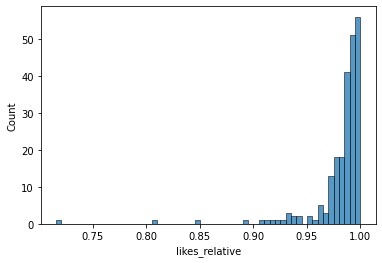

In [63]:
sns.histplot(data2_agg_video["likes_relative"])

In [64]:
mask_justice = (data2_agg_video["view_count"]>1000) & (data2_agg_video["dislike_count"]>0)
data2_agg_video["like_interaction"] = data2_agg_video["like_count"] + data2_agg_video["dislike_count"]
data2_agg_video["dislikes_relative"] = (data2_agg_video["dislike_count"]/data2_agg_video["like_interaction"])
data2_agg_video.sort_values(["dislikes_relative"], ascending=False,axis=0)[mask_justice].loc[:,["video_id","title","dislikes_relative","like_interaction","view_count","like_count","dislike_count"]].head()

C:\Users\agnid\AppData\Local\Temp/ipykernel_12100/1250078507.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2_agg_video.sort_values(["dislikes_relative"], ascending=False,axis=0)[mask_justice].loc[:,["video_id","title","dislikes_relative","like_interaction","view_count","like_count","dislike_count"]].head()


video_id                                              title  \
103  HJH0gfY6EUg  Reviewing Your Data Science Projects - Episode...   
151  _K6cNdgN3CI  Reviewing Your Data Science Projects - Episode...   
72   3Mm1U1CbzNw                     Is Data Science Right For You?   
154  mR2NCRgtLPE  Reviewing Your Data Science Projects - Episode...   
35   n3vw0M5RrPU                         How I Learned Data Science   

     dislikes_relative  like_interaction  view_count  like_count  \
103           0.284495               703       20655         503   
151           0.190698               215       10762         174   
72            0.153078              1202       44051        1018   
154           0.106383               188        5504         168   
35            0.091435              2767       87169        2514   

     dislike_count  
103            200  
151             41  
72             184  
154             20  
35             253

In [65]:
mask_justice = (data2_agg_video["view_count"]>1000)
data2_agg_video["comments_relative"] = data2_agg_video["comment_count"]/data2_agg_video["view_count"]
data2_agg_video.sort_values(["comments_relative"], ascending=False,axis=0)[mask_justice].iloc[1:,:].loc[:,["video_id","title","comment_count","comments_relative"]].head(10)

C:\Users\agnid\AppData\Local\Temp/ipykernel_12100/3549148697.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2_agg_video.sort_values(["comments_relative"], ascending=False,axis=0)[mask_justice].iloc[1:,:].loc[:,["video_id","title","comment_count","comments_relative"]].head(10)


video_id                                              title  \
6    -3d1NctSv0c    Ken Jee Q & A Live Stream (50,000 Sub Special!)   
19   QN3wXPZSjpE  Do You Have a Data Science Mentor? (@Danny Ma)...   
9    742LQ38OioU  Data Science Productivity, Motivation, and Org...   
30   g7on3Rw0Ovg  Fast Cars to Faster Data (Alex Castrounis) - K...   
16   S_CuB__nsmI  Sports Analytics & Streaming Data Science on T...   
14   Kq9dkZu0bpg  Hedge Funds, Startups, and Data Science Oh my!...   
18   6aaIbd-GpZs  Should You Major in Data Science? (Jaemin Lee)...   
5    Xgg7dIKys9E  Interview with the Director of AI Research @ N...   
107  tnpV1etgcxs              The PODCAST you might have asked for?   
22   _rbrdNTpZGo  Building a Deep Learning BEAST (NVIDIA TITAN R...   

     comment_count  comments_relative  
6              317           0.136285  
19             172           0.078611  
9              246           0.066289  
30             118           0.064728  
16             209           0.047339  
14             213           0.031050  
18             173           0.029833  
5              329           0.024499  
107             39           0.021242  
22             158           0.020089

In [66]:
mask_justice = (data2_agg_video["view_count"]>1000)
data2_agg_video["shares_relative"] = data2_agg_video["share_count"]/data2_agg_video["view_count"]
data2_agg_video.sort_values(["shares_relative"], ascending=False,axis=0)[mask_justice].iloc[1:,:].loc[:,["video_id","title","share_count","shares_relative"]].head(10)

C:\Users\agnid\AppData\Local\Temp/ipykernel_12100/1525230239.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2_agg_video.sort_values(["shares_relative"], ascending=False,axis=0)[mask_justice].iloc[1:,:].loc[:,["video_id","title","share_count","shares_relative"]].head(10)


video_id                                              title  \
8    4qZINLzwYyk  The State of Data Science with Krish Naik & Th...   
62   FqNpDNmpcEo  How Zillow Lost $500 MILLION With Machine Lear...   
7    Ip50cXvpWY4  The Best Free Data Science Courses Nobody is T...   
92   nrEJGGxcoTc             Is Your Phone REALLY Listening to You?   
76   YbTMIxjk4hI  The YouTube Algorithm EXPLAINED! (Tips from a ...   
64   rEWPqw6rMGI         The Only Data Science Explanation You Need   
154  mR2NCRgtLPE  Reviewing Your Data Science Projects - Episode...   
103  HJH0gfY6EUg  Reviewing Your Data Science Projects - Episode...   
178  ZWdyBbgGZBQ  Sports Analytics 101: The Pythagorean Theorem ...   
120  2OnXytYziF0                   What is Sports Analytics Really?   

     share_count  shares_relative  
8            544         0.027079  
62           309         0.018248  
7           4694         0.015793  
92            69         0.015102  
76            79         0.013860  
64           141         0.013720  
154           74         0.013445  
103          277         0.013411  
178           56         0.012894  
120          168         0.012611

<AxesSubplot:xlabel='shares_relative', ylabel='Count'>

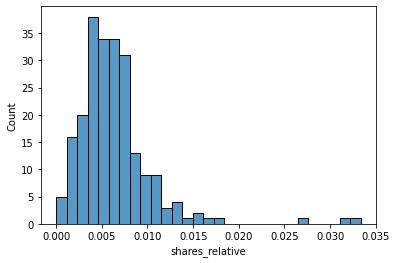

In [67]:
sns.histplot(data2_agg_video["shares_relative"])

In [68]:
q13_top1000 = data3_comments.sort_values(["like_count"],ascending=False,axis=0).head(1000)
q13 = q13_top1000["comment_text"].values
print(len(q13))
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(q13)
q13_top1000.head()

1000


comment_text  \
2644  Don’t sugarcoat things, Ken. Just tell me I’m ...   
1159  01:20 - 1) Learn programming in python or R \n...   
2655  Despite of all these .. and  No matter how man...   
9885  4 Main Project Topics\n\n1. Regression\n2. Cla...   
8681  1.  you're in it for the Money\n2.  you don't ...   

                      comment_id  reply_count  like_count  \
2644  UgwS0PxjPVEuuZWwi2p4AaABAg            6         501   
1159  Ugw8EnIPyJ-YthQb6HF4AaABAg            6         346   
2655  UgyaNCHJi_JGyyXj-I14AaABAg           17         317   
9885  Ugwn6ouaeL5CQvOXeMN4AaABAg            3         267   
8681  UgxM30A41eY9EPJMQPZ4AaABAg            5         255   

                          date     video_id    user_id  sentiment  
2644 2021-04-09 14:36:28+00:00  sHRq-LshG3U  user_1574     -0.184  
1159 2021-08-30 00:07:14+00:00  4OZip0cgOho  user_1411      0.112  
2655 2021-04-09 13:13:30+00:00  sHRq-LshG3U  user_3468     -0.166  
9885 2020-02-18 17:16:14+00:00  8igH8qZafpo  user_1996      0.000  
8681 2020-05-25 05:48:15+00:00  m5pwx3hgtzM  user_4674     -0.186

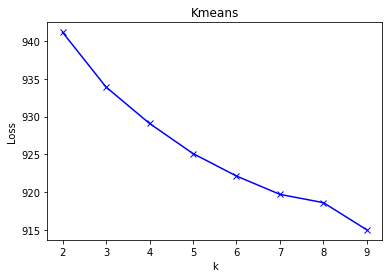

In [69]:
score = []
K = range(2,10)
for k in K:
   model = KMeans(n_clusters=k, max_iter=200, n_init=10)
   model = model.fit(X)
   score.append(model.inertia_)
plt.plot(K, score, 'bx-')
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Kmeans')
plt.show()

<AxesSubplot:xlabel='clusters', ylabel='Count'>

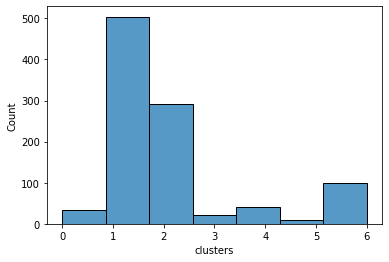

In [70]:
#Initiating the Agglomerative Clustering model 
n_clusters = 7
AC = AgglomerativeClustering(n_clusters=n_clusters)
# fit model and predict clusters
yhat_AC = AC.fit_predict(X.toarray())
q13_top1000["clusters"] = yhat_AC
sns.histplot(q13_top1000["clusters"],bins=n_clusters)

In [71]:
# Let's check what is the cluster 1 about
q13_top1000[q13_top1000["clusters"] == 1].loc[:,["comment_text","sentiment","like_count","reply_count"]].head(10)

comment_text  sentiment  \
2644  Don’t sugarcoat things, Ken. Just tell me I’m ...     -0.184   
8681  1.  you're in it for the Money\n2.  you don't ...     -0.186   
8005  This feels like a cheat code or something. The...      0.405   
9221  Phew! I thought you were going to say "For the...      0.000   
9230  I started to study Python one week ago and is ...      0.466   
7762  I've never commented on a YouTube video before...      0.356   
9246  So cool to see someone with the same backgroun...      0.132   
9672  There's nothing quite like a video that shows ...      0.113   
6734  tl;dr of the video-\n\nStatistics\n-Probabilit...      0.000   
711   As someone who's a relatively new data scienti...      0.244   

      like_count  reply_count  
2644         501            6  
8681         255            5  
8005         190            1  
9221         186            2  
9230         144           12  
7762         128            1  
9246         119            4  
9672         109            3  
6734         104            4  
711          103            1

In [72]:
# What about cluster 2?
q13_top1000[q13_top1000["clusters"] == 2].loc[:,["comment_text","sentiment","like_count","reply_count"]].head(10)

comment_text  sentiment  \
1159  01:20 - 1) Learn programming in python or R \n...      0.112   
9885  4 Main Project Topics\n\n1. Regression\n2. Cla...      0.000   
6455                                    Hey that’s me 😃      0.000   
303   I used your project-based learning approach fr...      0.057   
2648  It's can very well be a "who you know" industr...      0.075   
1902  1) learn programming(python) \n2) get familiar...      0.046   
516   We sold our house to Zillow right before they ...      0.106   
3331  I started learning data science due to the hyp...      0.109   
8822  I think I may have just discovered the most us...      0.242   
695   When I was 12 years old, I wanted to learn HTM...     -0.039   

      like_count  reply_count  
1159         346            6  
9885         267            3  
6455         182            8  
303          120           10  
2648         113            1  
1902         105            6  
516           94            5  
3331          91           10  
8822          79            2  
695           70            4

In [73]:
q13_top1000[q13_top1000["clusters"] == 2].loc[:,"comment_text"].values[10:15]

array(["Goal is to learn the basis of ML in the next 6 months. I'm going to come back to this comment",
       'Your advice is spot on:\n 1. be prepared to put a lot of time and effort into learning (in truth, the learning never stops. 😁)\n 2. be proactive about finding problems and solving them (plus, keep in mind there\'s a difference between asking for help because you\'re truly stuck vs. asking for help because you\'re too lazy to figure out how to solve a problem. Data scientists are supposed to be really good at problem solving. Being a data scientist who\'s asking for help all the time kind of undermines the purpose of being a data scientist. 😉\n 3. learn the math (I actually believe that most people have the ability to understand the math but, most have been taught math in a way that\'s not relevant enough nor interesting enough to them. When done right, I can\'t see how anyone can not love math.)\n4. learn coding\n5. tell great stories\n\n\nAlso, a quote I heard recently, make